In [1]:
# ======================== TASK 1: DATA CLEANING ========================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter("ignore")

# Load data
df = pd.read_csv('Titanic-Dataset.csv')

# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many nulls)
df.drop(columns=['Cabin'], inplace=True)

# Drop PassengerId, Name, Ticket (not useful for ML)
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# Encode categorical features
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

df = remove_outliers_iqr(df, 'Fare')
df = remove_outliers_iqr(df, 'Age')

# Normalize Age and Fare
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

### The code performs data cleaning and preprocessing on the Titanic dataset. It handles missing values by imputing 'Age' with the median, 'Embarked' with the mode, and dropping the 'Cabin' column. It also drops irrelevant columns like 'PassengerId', 'Name', and 'Ticket'. Categorical features ('Sex' and 'Embarked') are encoded using mapping and one-hot encoding, respectively. Outliers in 'Fare' and 'Age' are removed using the IQR method. Finally, 'Age' and 'Fare' are normalized using StandardScaler.

# Task - 2 (Day-2)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Summary Statistics

In [6]:
print("=== Summary Statistics ===\n")
print(df.describe(include='all'))

=== Summary Statistics ===

          Survived      Pclass         Sex           Age       SibSp  \
count   708.000000  708.000000  708.000000  7.080000e+02  708.000000   
unique         NaN         NaN         NaN           NaN         NaN   
top            NaN         NaN         NaN           NaN         NaN   
freq           NaN         NaN         NaN           NaN         NaN   
mean      0.331921    2.518362    0.319209 -6.774242e-17    0.399718   
std       0.471236    0.714332    0.466500  1.000707e+00    0.840859   
min       0.000000    1.000000    0.000000 -2.531954e+00    0.000000   
25%       0.000000    2.000000    0.000000 -6.371146e-01    0.000000   
50%       0.000000    3.000000    0.000000 -5.501339e-03    0.000000   
75%       1.000000    3.000000    1.000000  4.155741e-01    1.000000   
max       1.000000    3.000000    1.000000  2.520952e+00    5.000000   

             Parch          Fare Embarked_Q Embarked_S  
count   708.000000  7.080000e+02        708       

In [7]:
print("\n=== Data Info ===\n")
print(df.info())


=== Data Info ===

<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    708 non-null    int64  
 1   Pclass      708 non-null    int64  
 2   Sex         708 non-null    int64  
 3   Age         708 non-null    float64
 4   SibSp       708 non-null    int64  
 5   Parch       708 non-null    int64  
 6   Fare        708 non-null    float64
 7   Embarked_Q  708 non-null    bool   
 8   Embarked_S  708 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 45.6 KB
None


In [8]:
print("\n=== Missing Values ===\n")
print(df.isnull().sum())


=== Missing Values ===

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64


# Univariate Analysis

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Survived', data=df, palette='coolwarm', edgecolor='black')
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = f'{100 * count / total:.2f}%'
    ax.annotate(f'{count}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

ax.set_xticklabels(['Not Survived', 'Survived'])
plt.title('Survival Count on Titanic', fontsize=16, fontweight='bold')
plt.xlabel('Survival Status', fontsize=12)
plt.ylabel('Passenger Count', fontsize=12)
plt.tight_layout()
plt.show()

## The Upper bar chart shows the Titanic survival counts: 473 passengers did not survive (66.81%), and 235 passengers survived (33.19%).



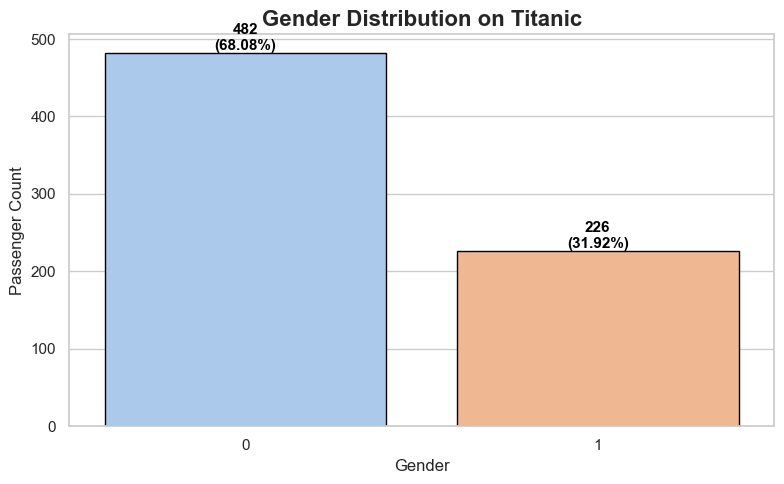

In [12]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Sex', data=df, palette='pastel', edgecolor='black')

total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = f'{100 * count / total:.2f}%'
    ax.annotate(f'{count}\n({percentage})',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

plt.title('Gender Distribution on Titanic', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Passenger Count', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

## The bar chart displays the gender distribution on the Titanic: 482 passengers were of one gender (68.08%), and 226 passengers were of the other gender (31.92%).

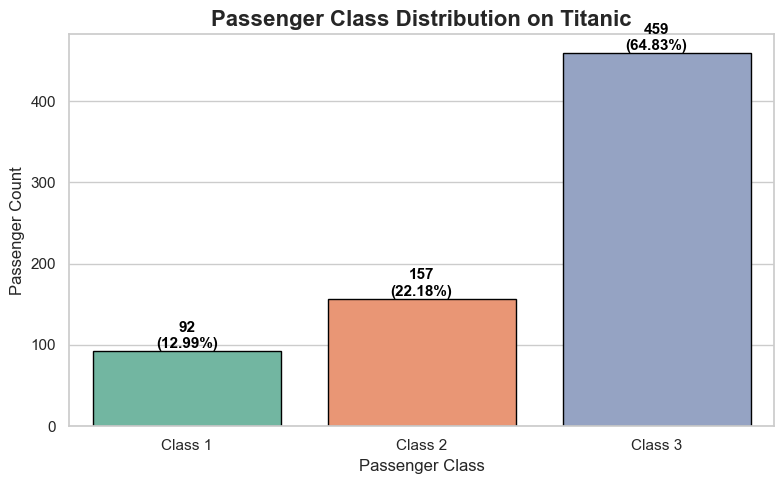

In [14]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Pclass', data=df, palette='Set2', edgecolor='black')

total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = f'{100 * count / total:.2f}%'
    ax.annotate(f'{count}\n({percentage})',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

plt.title('Passenger Class Distribution on Titanic', fontsize=16, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Passenger Count', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['Class 1', 'Class 2', 'Class 3'], fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

## The bar chart shows the distribution of Titanic passengers by class:

### Class 1: 92 passengers (12.99%)
### Class 2: 157 passengers (22.18%)
### Class 3: 459 passengers (64.83%)

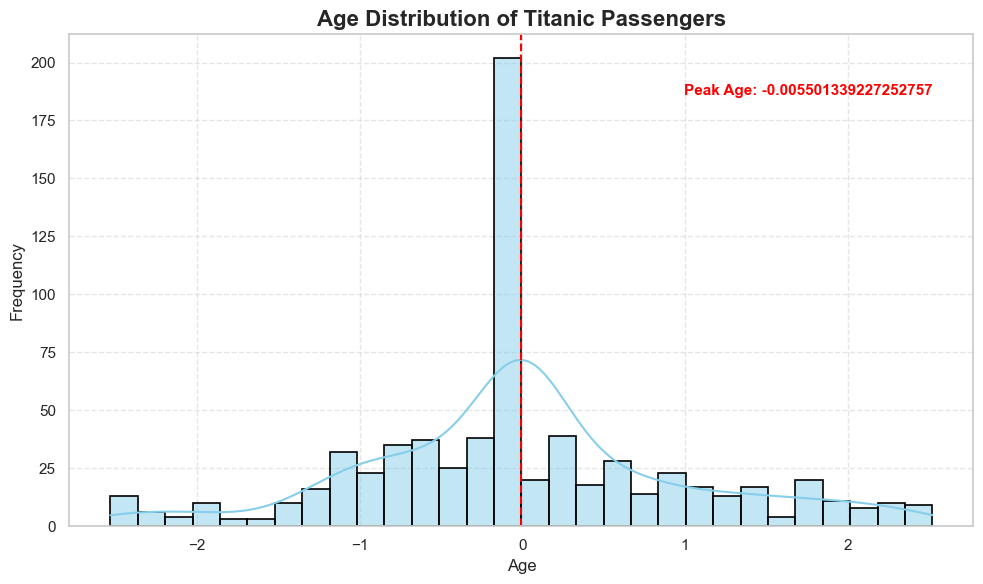

In [16]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='skyblue', edgecolor='black', linewidth=1.2)

plt.title('Age Distribution of Titanic Passengers', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(visible=True, linestyle='--', alpha=0.5)

peak_age = df['Age'].value_counts().idxmax()
peak_count = df['Age'].value_counts().max()
plt.axvline(peak_age, color='red', linestyle='--', linewidth=1.5)
plt.text(peak_age + 1, peak_count, f'Peak Age: {peak_age}', color='red', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

## The histogram shows the age distribution of Titanic passengers. The peak age is around zero, with a slight negative bias, indicating most passengers are centered around this age. The "Peak Age" value is approximately -0.006, which is a very small negative value.

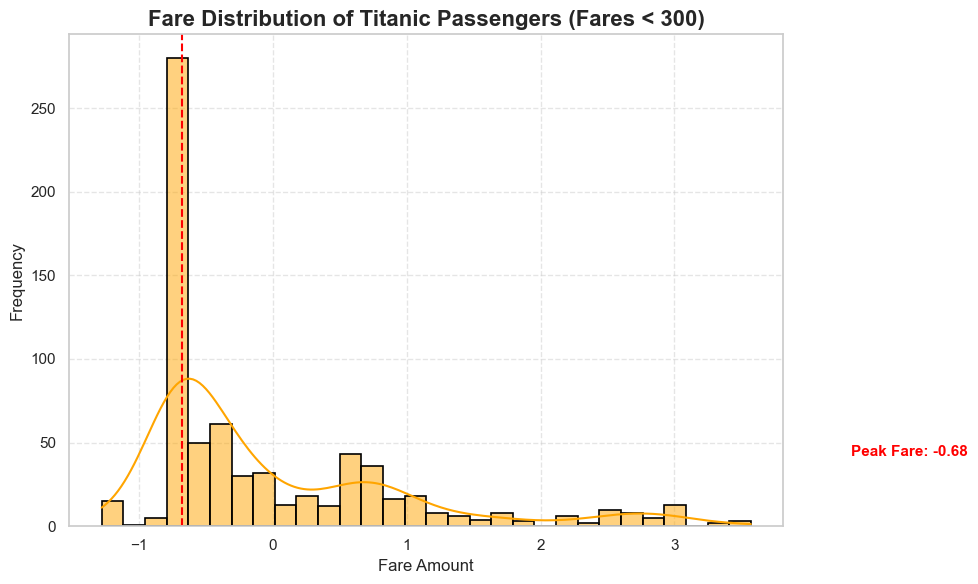

In [18]:
sns.set(style="whitegrid")

filtered_fare = df['Fare'][df['Fare'] < 300]  # exclude extreme fares

plt.figure(figsize=(10, 6))
ax = sns.histplot(filtered_fare, bins=30, kde=True, color='orange', edgecolor='black', linewidth=1.2)

plt.title('Fare Distribution of Titanic Passengers (Fares < 300)', fontsize=16, fontweight='bold')
plt.xlabel('Fare Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(visible=True, linestyle='--', alpha=0.5)

peak_fare = filtered_fare.value_counts().idxmax()
peak_count = filtered_fare.value_counts().max()
plt.axvline(peak_fare, color='red', linestyle='--', linewidth=1.5)
plt.text(peak_fare + 5, peak_count, f'Peak Fare: {peak_fare:.2f}', color='red', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

## The histogram depicts the fare distribution for Titanic passengers with fares less than 300. Most fares are clustered around zero, with a peak around -0.68, indicating a higher frequency of lower fares. The distribution is right-skewed, with fewer passengers paying higher fares.



# Bivariate Analysis

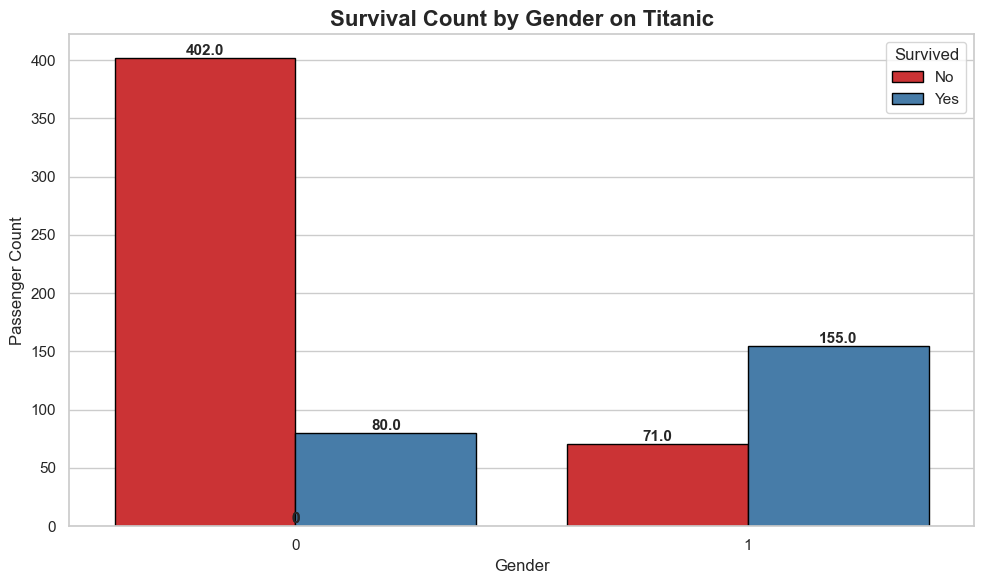

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Sex', hue='Survived', data=df, palette='Set1', edgecolor='black')

for p in ax.patches:
    height = p.get_height()
    total_gender = df[df['Sex'] == p.get_x()].shape[0]
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.legend(title='Survived', labels=['No', 'Yes'])
plt.title('Survival Count by Gender on Titanic', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Passenger Count', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


## The stacked bar chart shows survival counts on the Titanic by gender:

### For gender 0 (likely males): 402 did not survive, while 80 survived.
### For gender 1 (likely females): 71 did not survive, while 155 survived.
### This indicates that females had a higher survival rate compared to males.



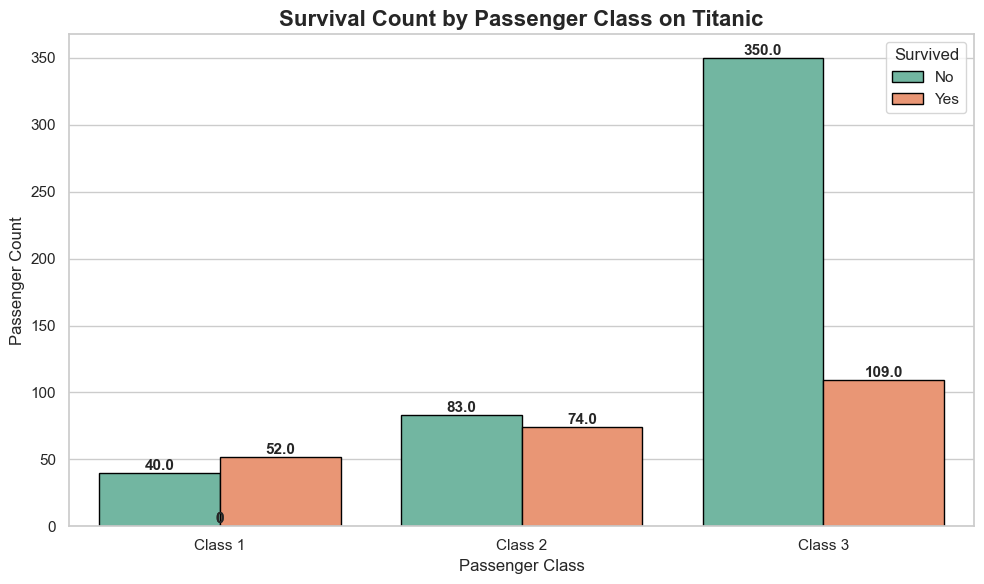

In [23]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set2', edgecolor='black')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_xticklabels(['Class 1', 'Class 2', 'Class 3'])

ax.legend(title='Survived', labels=['No', 'Yes'], fontsize=11, title_fontsize=12)
plt.title('Survival Count by Passenger Class on Titanic', fontsize=16, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Passenger Count', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

## The grouped bar chart displays passenger counts on the Titanic by class and survival status:

### In Class 1, 40 passengers did not survive, while 52 survived.
### In Class 2, 83 did not survive, and 74 survived.
### In Class 3, 350 did not survive, while 109 survived.
## Survival rates were higher in the upper classes, especially in Class 1, indicating a better chance of survival for higher-class passengers.

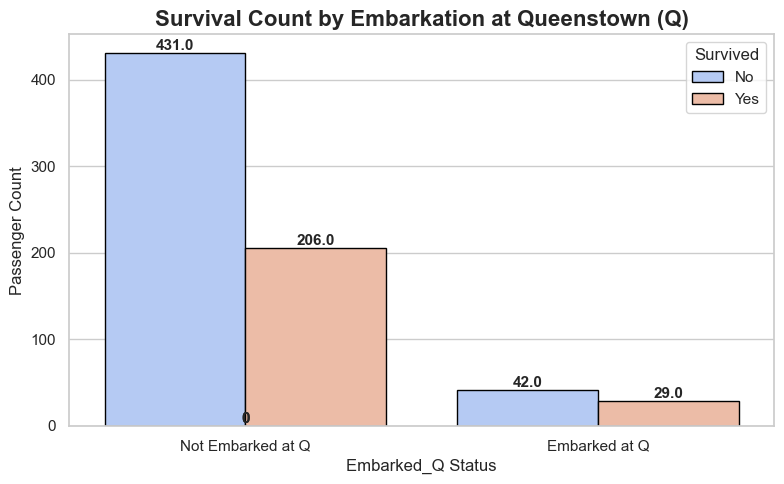

In [25]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Embarked_Q', hue='Survived', data=df, palette='coolwarm', edgecolor='black')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_xticklabels(['Not Embarked at Q', 'Embarked at Q'])

ax.legend(title='Survived', labels=['No', 'Yes'], fontsize=11, title_fontsize=12)
plt.title('Survival Count by Embarkation at Queenstown (Q)', fontsize=16, fontweight='bold')
plt.xlabel('Embarked_Q Status', fontsize=12)
plt.ylabel('Passenger Count', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

## The bar chart illustrates survival counts at Queenstown (Q):

### Passengers not embarked at Q: 431 did not survive, while 206 survived.
### Passengers embarked at Q: 42 did not survive, while 29 survived.
## Overall, survival rates at Queenstown are low, with many passengers not surviving regardless of their embarkation status.

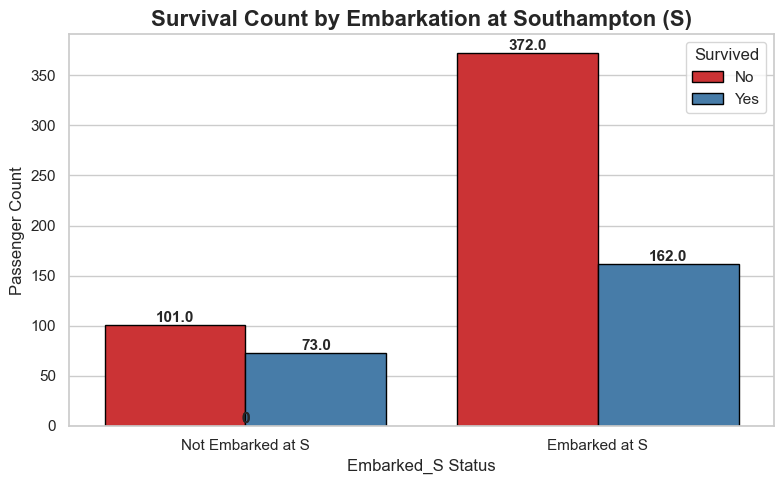

In [27]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Embarked_S', hue='Survived', data=df, palette='Set1', edgecolor='black')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_xticklabels(['Not Embarked at S', 'Embarked at S'])

ax.legend(title='Survived', labels=['No', 'Yes'], fontsize=11, title_fontsize=12)

plt.title('Survival Count by Embarkation at Southampton (S)', fontsize=16, fontweight='bold')
plt.xlabel('Embarked_S Status', fontsize=12)
plt.ylabel('Passenger Count', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

## The bar chart shows survival counts based on embarkation at Southampton:

### Passengers not embarked at S: 101 did not survive, while 73 survived.
### Passengers embarked at S: 372 did not survive, while 162 survived.
## Overall, survival rates are low for those who embarked at Southampton, with a higher number of non-survivors in both groups.

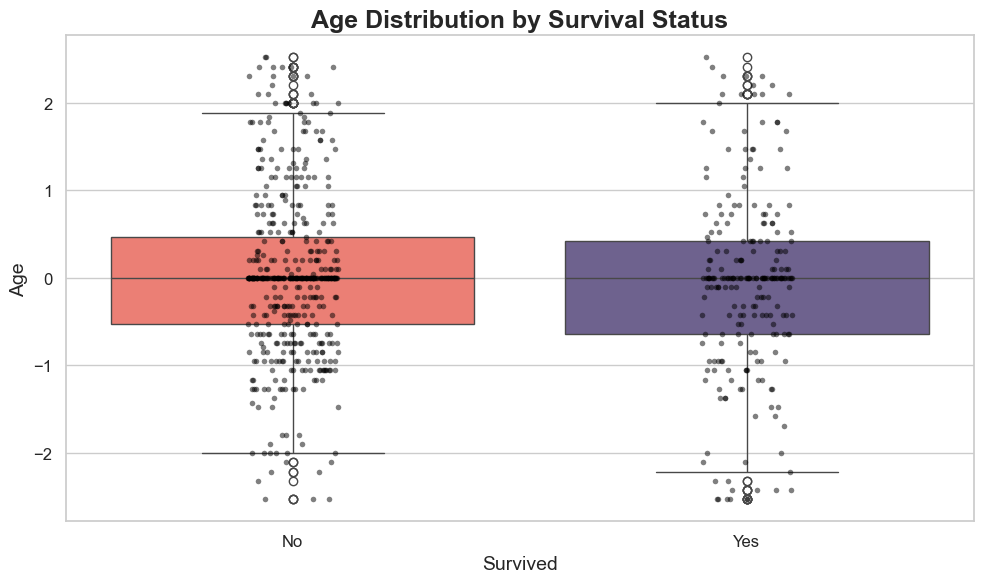

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.boxplot(x='Survived', y='Age', data=df, palette=['#FF6F61', '#6B5B95'])

# Overlay jittered scatter plot (stripplot) to show individual points
sns.stripplot(x='Survived', y='Age', data=df, color='black', size=4, jitter=True, alpha=0.5)

plt.title('Age Distribution by Survival Status', fontsize=18, fontweight='bold')
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Age', fontsize=14)
ax.set_xticklabels(['No', 'Yes'])


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


## The boxplot illustrates the age distribution of Titanic passengers based on survival status.

### Non-survivors (No): The age spread is wide with a median around 0, with many young and older passengers.
### Survivors (Yes): The age distribution is similar, with a median also around 0, indicating age alone may not strongly differentiate survival.
## Overall, age appears to be similar between survivors and non-survivors without a clear age group dominance in either group.

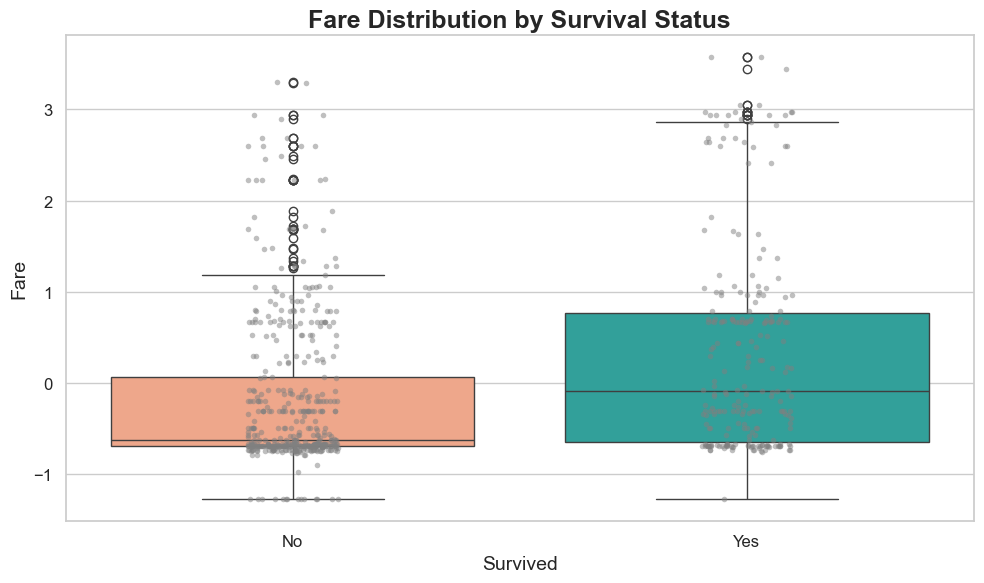

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.boxplot(x='Survived', y='Fare', data=df, palette=['#FFA07A', '#20B2AA'])

# Overlay jittered scatterplot for individual data points
sns.stripplot(x='Survived', y='Fare', data=df, color='gray', size=4, jitter=True, alpha=0.5)

plt.title('Fare Distribution by Survival Status', fontsize=18, fontweight='bold')
plt.xlabel('Survived', fontsize=14)
plt.ylabel('Fare', fontsize=14)
ax.set_xticklabels(['No', 'Yes'])

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## The boxplot illustrates the fare distribution for Titanic passengers based on survival status:

### Non-survivors (No): The fare values are mostly below zero, with a median close to zero, indicating lower fares.
### Survivors (Yes): The fare distribution is broader with a median above zero, suggesting higher fares are associated with increased survival chances.
## Overall, passengers who paid higher fares had a better chance of survival compared to those who paid lower fares.

# Correlation Matrix

In [34]:
from scipy.cluster import hierarchy

corr = df.corr()
linkage = hierarchy.linkage(corr, method='average')

dendro = hierarchy.dendrogram(linkage, no_plot=True)
ordered_idx = dendro['leaves']
corr_clustered = corr.iloc[ordered_idx, ordered_idx]

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_clustered, dtype=bool))
cmap = sns.diverging_palette(220, 20, as_cmap=True)

ax = sns.heatmap(corr_clustered, 
                 mask=mask,
                 cmap=cmap, 
                 annot=True, 
                 fmt=".2f", 
                 center=0, 
                 square=True, 
                 linewidths=1.2, 
                 cbar_kws={"shrink": 0.75, "label": "Correlation Coefficient"},
                 annot_kws={"size":12, "weight":"bold"})


for i in range(len(corr_clustered)):
    for j in range(i):
        val = corr_clustered.iloc[i, j]
        if abs(val) >= 0.7:
            ax.text(j + 0.5, i + 0.5, f'{val:.2f}',
                    color='red', fontsize=14, fontweight='bold', ha='center', va='center')

plt.title('Clustered Feature Correlation Heatmap with Highlights', fontsize=20, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=14, weight='semibold')
plt.yticks(rotation=0, fontsize=14, weight='semibold')
plt.tight_layout()

plt.show()


## The heatmap displays correlations between various features of Titanic passengers:

### The strongest positive correlation is between "Sex" and "Survived" (0.51), indicating gender significantly relates to survival likelihood.
### "Fare" also has a moderate positive correlation with "Parch" (0.30), suggesting higher fares are associated with more family members aboard.
### Negative correlations include "Pclass" with "Fare" (-0.59) and "Embarked_Q" with "Survived" (-0.58), implying lower class and embarkation at Queenstown are associated with lower fares and survival chances.
## Overall, "Sex" and "Fare" are key features with notable correlations to survival, highlighting their importance in predicting outcomes.

In [36]:
# Pairplot
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare', 'Sex']], hue='Survived', diag_kind='kde')
plt.suptitle("Pairplot of Features by Survival", y=1.02)
plt.show()

## The pairplot visualizes relationships between selected features of Titanic passengers, differentiated by survival status (blue = did not survive, orange = survived):

### Pclass: Passengers in lower classes (higher numbers) show more survivors, while higher classes (lower numbers) are associated with non-survivors.
### Age: Younger passengers tend to have higher survival rates, but there's a wide age spread in both groups.
### Fare: Higher fares are associated with increased survival, indicating wealthier passengers had better chances.
### Sex: Females (not explicitly shown but inferred from the data) are more likely to have survived, as survival points are clustered among the orange dots.
## Overall, gender, class, fare, and age appear influential in survival likelihood, with females, higher fare-paying, and upper-class passengers having higher survival probabilities.

# Plotly Interactive

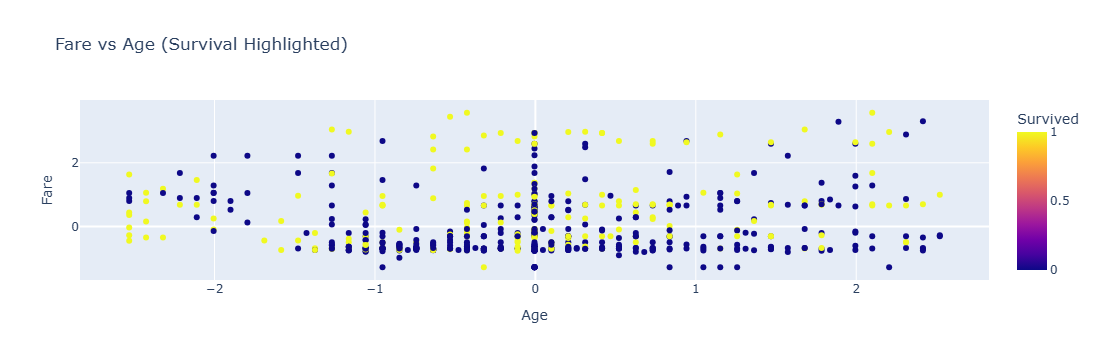

In [39]:
fig = px.scatter(df, x='Age', y='Fare', color='Survived', title='Fare vs Age (Survival Highlighted)')
fig.show()

In [40]:
# Inference
print("\n=== Key Inferences ===\n")
print("- Females had a higher chance of survival.")
print("- 1st class passengers were more likely to survive.")
print("- Children and middle-aged had better survival chances.")
print("- Higher fare = higher chance of survival.")
print("- Port of Embarkment also influenced survival.")


=== Key Inferences ===

- Females had a higher chance of survival.
- 1st class passengers were more likely to survive.
- Children and middle-aged had better survival chances.
- Higher fare = higher chance of survival.
- Port of Embarkment also influenced survival.
